In [14]:
# Import needed packages
import numpy as np
import pandas as pd
import random
from scipy.spatial.distance import cdist, pdist
import matplotlib.pyplot as plt
from sklearn import metrics, preprocessing, datasets
import sklearn.cluster as cluster
from IPython.display import display

In [15]:
# Create function to convert raw data to Z scores
def ZScores(df,input,new_col_name):
    
    data1 = (input - input.mean())/input.std(ddof=0)
    data2 = data1.reshape((-1,1))
    data3 = pd.DataFrame({new_col_name:data2[:,0]})
    final_data = pd.concat([df, data3], axis=1)
    
    return final_data

In [16]:
# Create function to perform Elbow method to determine the optimal k                         
def ElbowMethod(data,max_k):
    clusters=range(1,max_k)
    meandist=[]

    for k in clusters:
        model=cluster.KMeans(n_clusters=k)
        model.fit(data)
        clusassign=model.predict(data)
        meandist.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1)) 
        / feature_data.shape[0])

    """
    Plot average distance from observations from the cluster centroid
    to use the Elbow Method to identify number of clusters to choose
    """

    # Plot the Elbow Method
    plt.plot(clusters, meandist)
    plt.xlabel('Number of clusters')
    plt.ylabel('Average distance within each cluster')
    plt.title('Selecting k with the Elbow Method')
    plt.show()    

In [17]:
# Create class to perform K means clustering
class KMeansClass:         

    
    # Store the original data with initialization
    def __init__(self, original_data):
        self.OrigData = original_data
    
    
    # Function to perform actual K means clustering
    def _k_means(self,k,features):

        k_means = cluster.KMeans(n_clusters=k)
        k_means.fit(features)
        labels = k_means.labels_

        return labels
                        
            
    # Function to add K means results; K means clustering is performed x number of times
    def TrainModel(self,features,k,runs):

        self.TotalData = self.OrigData
        
        for i in range(1,runs+1):

            # self.TotalDataNoShuffle = self.TotalDataNoShuffle.sample(frac=1)
            train_data = pd.DataFrame()

            for f in features:
                train_data = pd.concat([train_data,self.TotalData[f]],axis=1)

            labels = self._k_means(k,train_data)
            labels_t = pd.DataFrame({'label_%d' %i :labels.reshape((-1,1))[:,0]})
            self.TotalData = pd.concat([self.TotalData,labels_t], axis=1)

In [18]:
# Create a function to find the mean and standard deviations of a set of features
def MeanStdTable(data):
    df = pd.DataFrame(columns=['Feature','Mean','Standard_Deviation'])    
    for i in data:
        df = df.append({'Feature': i, 'Mean': data[i].mean(), 'Standard_Deviation': data[i].std()}, ignore_index=True)
    return df

In [19]:
# Load dataset
import os
os.chdir("/Users/kwheatley/Desktop/Interview/Datasets")
filename = 'linear_reg.csv'
dta = pd.read_csv(filename,sep=',',header=0)

In [20]:
# Convert numerical features to Z scores
dta = ZScores(dta,dta.erbmi,'norm_erbmi')
dta = ZScores(dta,dta.ertpreat,'norm_ertpreat')
dta = ZScores(dta,dta.ertseat,'norm_ertseat')
dta = ZScores(dta,dta.eufastfdfrq,'norm_eufastfdfrq')
dta = ZScores(dta,dta.euexfreq,'norm_euexfreq')
dta = ZScores(dta,dta.eugenhth,'norm_eugenhth')

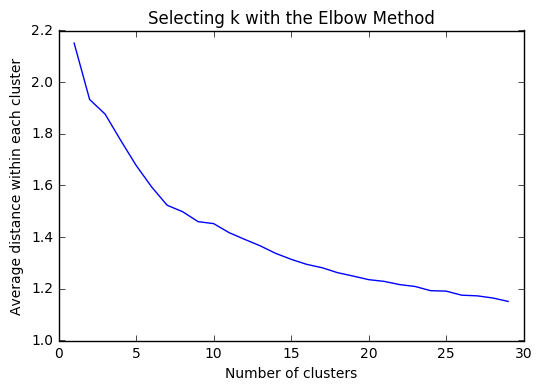

In [21]:
# Perform Elbow method to determine optimal k
feature_data = dta[['norm_erbmi','norm_ertpreat','norm_ertseat','norm_eufastfdfrq','norm_euexfreq','norm_eugenhth']]
ElbowMethod(feature_data,30)

In [22]:
# Perform K means clustering on data

## List the features used in K means clustering
features = ('norm_erbmi','norm_ertpreat','norm_ertseat','norm_eufastfdfrq','norm_euexfreq','norm_eugenhth')

## Create the class
model = KMeansClass(dta)

## Train the model using k=7 with runs=10
model.TrainModel(features,k=7,runs=10)

In [23]:
# Compare resulting labels of K means clustering
model.TotalData

,erbmi,erincome1,erincome2,erincome3,erincome4,erincome5,ertpreat,ertseat,eueat,euexfreq,...,label_1,label_2,label_3,label_4,label_5,label_6,label_7,label_8,label_9,label_10
0,46.900002,0,0,0,0,1,45,0,0,0,...,0,1,0,3,6,4,6,3,6,6
1,17.700001,1,0,0,0,0,150,0,0,5,...,6,0,5,2,3,0,3,6,0,0
2,36.500000,1,0,0,0,0,30,0,0,0,...,0,1,0,3,6,4,6,3,6,6
3,43.299999,0,0,0,0,1,65,0,0,0,...,0,1,0,3,6,4,6,3,6,6
4,23.700001,1,0,0,0,0,65,7,1,4,...,2,2,2,4,4,2,0,0,1,1
5,18.000000,1,0,0,0,0,165,25,1,0,...,6,0,5,2,3,0,3,6,0,0
6,30.700001,0,0,0,0,1,80,0,0,6,...,2,2,2,4,4,2,0,0,1,1
7,24.799999,1,0,0,0,0,110,10,1,0,...,6,0,5,2,3,0,3,6,0,0
8,29.500000,1,0,0,0,0,60,0,0,7,...,1,6,1,0,5,1,5,1,4,2
9,26.799999,1,0,0,0,0,70,4,1,1,...,4,3,3,1,2,6,2,2,2,5


In [24]:
# This cell analyzes the feature averages for two different runs of the clustering
# Analyze label averages and standard deviations

## Here we clean column names for display
final_data = model.TotalData
final_data = final_data.rename(columns={'erbmi':'BMI',
                                       'ertpreat':'Primary_Eating',
                                       'ertseat':'Secondary_Eating',
                                       'eufastfdfrq':'Fast_Food_Freq',
                                       'euexfreq':'Exercise_Freq',
                                       'eugenhth':'Health',
                                       })

## Here we find the mean and standard deviation for data in the first run
lab1_mean = final_data.groupby(['label_1'])['BMI','Primary_Eating','Secondary_Eating',
                                'Fast_Food_Freq','Exercise_Freq','Health'].agg(['mean','std'])
lab1_mean = lab1_mean.sort_values([('BMI','mean')], ascending=True)
lab1_mean = lab1_mean.round(2)

## Here we find the mean and standard deviation for data in the second run
lab2_mean = final_data.groupby(['label_2'])['BMI','Primary_Eating','Secondary_Eating',
                                'Fast_Food_Freq','Exercise_Freq','Health'].agg(['mean','std'])
lab2_mean = lab2_mean.sort_values([('BMI','mean')], ascending=True)
lab2_mean = lab2_mean.round(2)

In [25]:
# This displays the means and standard deviations of features for the different clusters for Run 2
display(lab1_mean)

# This displays the means and standard deviations of features for the different clusters for Run 2
display(lab2_mean)

BMI       Primary_Eating        Secondary_Eating          \
          mean   std           mean    std             mean     std   
label_1                                                               
1        25.32  4.04          56.06  31.55            13.28   23.64   
4        25.59  3.84          51.32  28.13            13.11   21.83   
6        26.18  4.19         154.31  46.16             8.63   21.90   
2        26.53  3.85          49.01  30.01            11.34   22.07   
5        27.89  6.57          51.35  47.20           377.24  158.71   
3        27.90  4.93          63.23  41.49            13.81   23.84   
0        39.33  5.44          55.43  35.66            12.59   23.24   

        Fast_Food_Freq       Exercise_Freq       Health        
                  mean   std          mean   std   mean   std  
label_1                                                        
1                 0.95  1.20          7.02  3.20   2.00  0.87  
4                 1.21  1.24          1.79  1.60   1.65  0.48  
6                 1.24  1.38          2.77  2.26   2.26  0.91  
2                 0.92  1.15          1.16  1.58   3.50  0.69  
5                 1.84  2.28          2.37  2.63   2.66  1.16  
3                 6.82  2.84          2.40  2.41   2.42  0.88  
0                 1.45  1.53          1.64  2.13   3.31  0.86

BMI       Primary_Eating        Secondary_Eating          \
          mean   std           mean    std             mean     std   
label_2                                                               
6        25.32  4.04          56.06  31.55            13.28   23.64   
3        25.60  3.84          51.31  28.13            13.10   21.83   
0        26.16  4.17         154.34  46.19             8.64   21.92   
2        26.53  3.85          49.01  30.01            11.34   22.07   
4        27.89  6.57          51.35  47.20           377.24  158.71   
5        27.90  4.93          63.23  41.49            13.81   23.84   
1        39.32  5.44          55.65  35.90            12.58   23.23   

        Fast_Food_Freq       Exercise_Freq       Health        
                  mean   std          mean   std   mean   std  
label_2                                                        
6                 0.95  1.20          7.02  3.20   2.00  0.87  
3                 1.21  1.24          1.79  1.60   1.65  0.48  
0                 1.24  1.38          2.78  2.26   2.25  0.91  
2                 0.92  1.15          1.16  1.58   3.50  0.69  
4                 1.84  2.28          2.37  2.63   2.66  1.16  
5                 6.82  2.84          2.40  2.41   2.42  0.88  
1                 1.45  1.53          1.64  2.12   3.31  0.85

In [26]:
# Analyze label cluster counts

## Here we get the sample counts for the first run
lab1_count = final_data.groupby(['label_1'])['BMI'].agg(['mean','std','count'])
lab1_count = lab1_count.sort_values([('mean')], ascending=True)
lab1_count = lab1_count.rename(columns={'mean':'BMI_mean','std':'BMI_std','count':'Total_Sample_Count'})
lab1_count = lab1_count.round(2)

## Here we get the sample counts for the second run
lab2_count = final_data.groupby(['label_2'])['BMI'].agg(['mean','std','count'])
lab2_count = lab2_count.sort_values([('mean')], ascending=True)
lab2_count = lab2_count.rename(columns={'mean':'BMI_mean','std':'BMI_std','count':'Total_Sample_Count'})
lab2_count = lab2_count.round(2)

In [27]:
# This table displays the total sample count for each cluster in for Run 1
display(lab1_count)

# This table displays the total sample count for each cluster in for Run 2
display(lab2_count)

,BMI_mean,BMI_std,Total_Sample_Count
label_1,,,
1,25.32,4.04,1661
4,25.59,3.84,2655
6,26.18,4.19,1258
2,26.53,3.85,2375
5,27.89,6.57,136
3,27.90,4.93,847
0,39.33,5.44,1289


,BMI_mean,BMI_std,Total_Sample_Count
label_2,,,
6,25.32,4.04,1661
3,25.60,3.84,2656
0,26.16,4.17,1255
2,26.53,3.85,2375
4,27.89,6.57,136
5,27.90,4.93,847
1,39.32,5.44,1291


In [15]:
# End of Notebook